<a href="https://colab.research.google.com/github/jumafernandez/BDM/blob/master/Guias/Guia_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes con Scikit Learn

## Introducción
En esta guia vamos a experimientar como trabajar con el algoritmo de _naive Bayes_, que es una técnica de aprendizaje automático supervisada para clasificación. Vamos a utilizar el dataset _iris_, con el que ya hemos trabajado en varias guías de laboratorio y TP's.
<br />
A lo largo de esta guía veremos:
- Como preprocesar el dataset y prepararlo para trabajar con Naive Bayes (NB) en Scikit Learn,
- Como entrenar un clasificador NB con la librería Scikit Learn,
- Como graficar el modelo entrenado,
- Como generar nuevas métricas de evaluación de los modelos,
- Cuales son los hiper-parámetros mas importantes del algoritmo,
- Como predecir la clase ante la aparición de nuevas instancias utilizando el modelo y la probabilidad aparejada.

## Trabajando con datos en Scikit Learn (Python)
Para iniciar vamos a cargar los datos desde Scikit-Learn, que es una de las modalidades que ya veníamos trabajando. Como sabemos, se va a instanciar un objeto bunch que es básicamente un diccionario:


In [0]:
# Importamos el dataset iris de la librerías sklearn.datasets
from sklearn.datasets import load_iris

# Iris será un objeto "bunch" que es básicamente un diccionario de Python con un conjunto de claves
iris = load_iris()


### Preprarando los datos para trabajar con NB en Scikit Learn

Al igual que hicimos con árboles de clasificación, vamos a tener que transformar los atributos discretos a numéricos previo a entrenar el clasificador. En este caso, el dataset no va a sufrir modificaciones puesto que todos sus _features_ son continuos, pero el código es facilmente trasladable a datasets con atributos cualitativos.

In [110]:
from sklearn import preprocessing

# Cantidad de columnas
ncols=iris.data.shape[1]

# Creamos el objeto labelEncoder
le = preprocessing.LabelEncoder()

# Numerizamos todos los atributos que no sean numéricos
for column in range(0, ncols-1):
  if (iris.data[:,column].dtype == object):
    iris.data[:,column] = le.fit_transform(iris.data[:,column])

iris.data[0:6]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

Y generamos nuestro conjunto de _train_ y de _test_ como venimos haciendo:

In [0]:
from sklearn.model_selection import train_test_split

# Separo en 70-30 entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0, test_size=0.3)


## Clasificador Naive Bayes con Scikit Learn

Scikit Learn provee tres clases para clasificación con Naive Bayes:
- __GaussianNB:__ Éste clasificador supone que la distribución de los datos es gaussiana (__warning!__).
-  __MultinomialNB:__ En éste caso, el caso, el clasificador asume un distribución multinomial de los datos.
- __ComplementNB:__ Ésta es una tercera implementación del clasificador que posee optimizaciones para trabajar con datasets desbalanceados.
<br /> 

En ésta guía vamos a limitarnos a trabajar con una única clase de éstas tres (MultinomialNB) pero sería muy sencillo cambiar el clasificador puesto que las tres clases poseen métodos muy similares.

<br />

### Entrenando un clasificador NB
A continuación, vamos a explorar como entrenar clasificador Naive Bayes, analizar el modelo entrenado y evaluarlo:

In [0]:
# Importamos el módulo GaussianNB de scikit-learn
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

modelo = GaussianNB()


Ahora vamos a entrenar el modelo, para ello le pasamos los datos de los _features_ y el _target_:

In [113]:
# Ahora vamos a entrenar el dato con el método fit -le pasamos los X e Y
# X e Y (X=atributos e Y=target)
modelo.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

## Utilizando el modelo para clasificar/predecir casos nuevos

A partir del modelo generado, podríamos darle un nuevo caso y el árbol debería clasificarlo, lo cual equivale a "predecir" su clase:

In [114]:
# Haciendo nuevas predicciones a partir de los datos
pred_ejemplo1 = int(modelo.predict([[5, 7, 1, 3]]))
pred_ejemplo2 = int(modelo.predict([[1, 1, 1, 1]]))
pred_ejemplo3 = int(modelo.predict([[15, 17, 11, 13]]))

print(f"Este ejemplo corresponde a una flor {iris.target_names[pred_ejemplo1]}.")
print(f"Este ejemplo corresponde a una flor {iris.target_names[pred_ejemplo2]}.")
print(f"Este ejemplo corresponde a una flor {iris.target_names[pred_ejemplo3]}.")


Este ejemplo corresponde a una flor virginica.
Este ejemplo corresponde a una flor versicolor.
Este ejemplo corresponde a una flor virginica.


## Parámetros de NB

Como la mayoría de los algoritmos de aprendizaje automático, NB posee hiper-parámetros que podemos ajustar.

In [115]:
from sklearn import metrics

# Creo nuevamente el objeto
# En este caso, instancio, los parametros a ajustar son:
# priors: cual es el criterio utilizado para la separación de instancias (gini o entropy)
# var_smoothing: máxima profundidad del árbol en términos de niveles
# fit_prior: (Solo para MultinomialNB y ComplementNB)=True
# norm (Solo para ComplementNB)
modelo_parametrizado = GaussianNB()

# Entreno el Decision Tree Classifer con el mismo muestreo generado antes (70-30 %)
modelo_parametrizado = modelo_parametrizado.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = modelo_parametrizado.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


## Métricas de evaluación de modelos

Como vimos en teoría, luego debemos evaluar el modelo generado, para saber que tan robusto es. En _Scikit Learn_ lo hacemos de la siguiente manera:

In [116]:
#Importar el módulo metrics de scikit-learn
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report

# Vamos a testear el modelo
print("Accuracy:",accuracy_score(y_test, y_pred))

# Vemos un reporte de clasificación de varias métricas
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



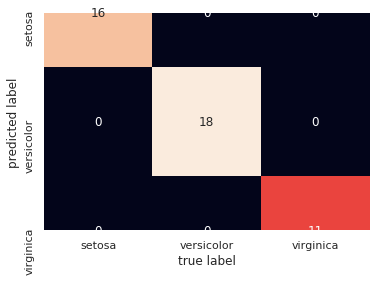

In [117]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

species = np.array(y_test)
predictions = np.array(y_pred)

mat = metrics.confusion_matrix(species, predictions)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');


## Referencias & Recursos Web

- https://scikit-learn.org/stable/modules/naive_bayes.html

- https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

- https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

- https://www.sicara.ai/blog/2018-02-28-naive-bayes-classification-sklearn
